In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Задание:
Решить три задачи из задачника. Найти приближенные решения, применяя метод монте-карло,сравнить их с правильным ответом.

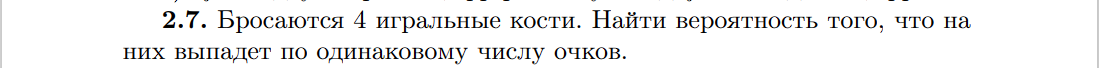

Вероятность получить определенный набор очков равна: 1/6 * 1/6 * 1/6 * 1/6 <br>
Таких подходящих наборов у нас 6, на каждую сторону кости:

In [2]:
theoretical_probability = round(6 * (1/6) ** 4, 4)
theoretical_probability

0.0046

Методом Монте-Карло:

0.006624


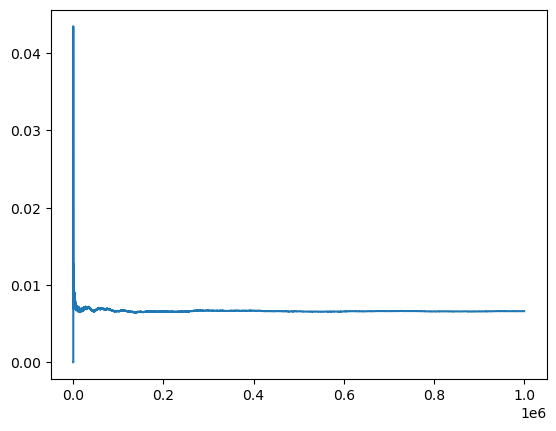

In [3]:
# установим зерно генератора случайных чисел
np.random.seed(seed=123321)
# количество экспериментов
amount = 1000000
# будем записывать изменение вероятности
proba = []
# общее количество экспериментов и количество подходящих комбинаций
success = 0
count = 0
for _ in range(amount):
    # берем 4 числа из равномерного распределения и сравниваем между собой
    a, b, c, d = np.random.uniform(0.1, 0.6, 4).round(1)
    count += 1
    if a == b == c == d:
        success += 1
    # считаем текущую вероятность
    proba.append(success / count)
# последняя полученная вероятность
print(proba[-1])
# изобразим как менялась наша вероятность
plt.plot(range(amount), proba)
plt.show()

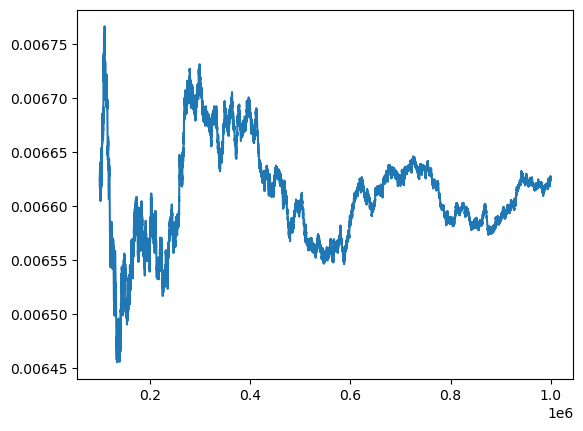

In [4]:
# отобразим как менялись последние 100 тыс. вероятностей
plt.plot(range(100000, amount), proba[100000:])
plt.show()

In [5]:
error = int((((proba[-1] / theoretical_probability) - 1) * 100))
print('Погрешность составила',error,'%')

Погрешность составила 43 %


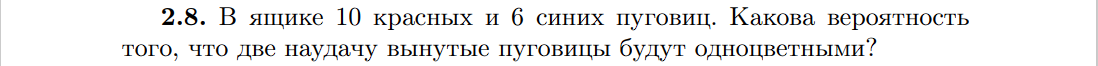

In [6]:
theoretical_probability = (10 / 16) * (9 / 15) + (6 / 16) * (5 /15)
theoretical_probability

0.5

Методом Монте-Карло:

In [7]:
box = [1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1]

0.486137


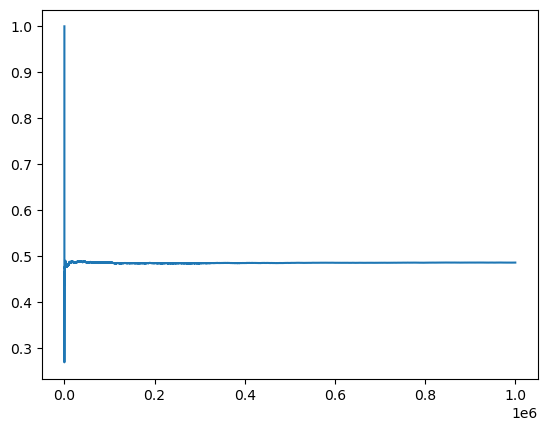

In [8]:
np.random.seed(seed=123321)
amount = 1000000
proba = []
success = 0
count = 0
for _ in range(amount):
    box_copy = box.copy()
    # выбираем 1 пуговицу
    first = int(np.random.uniform(1, 16))
    button_1 = box_copy[first]
    # убираем пуговицу из мешка 
    box_copy.pop(first)
    # выбираем 2 пуговицу
    second = int(np.random.uniform(1, 15))
    button_2 = box_copy[second]
    count += 1
    # сравниваем пуговицы
    if button_1 == button_2:
        success += 1
    proba.append(success / count)
# последняя полученная вероятность
print(proba[-1])
# изобразим как менялась наша вероятность
plt.plot(range(amount), proba)
plt.show()

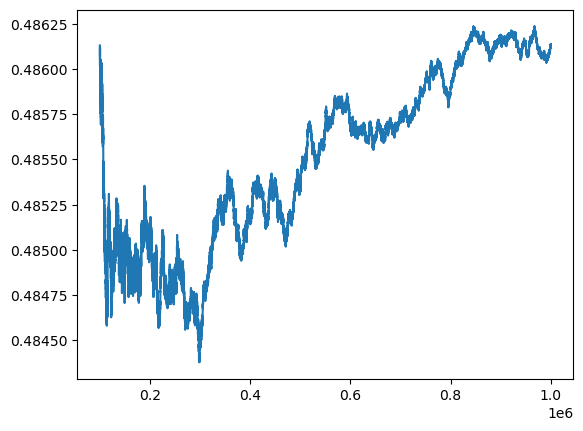

In [9]:
# отобразим как менялись последние 100 тыс. вероятностей
plt.plot(range(100000, amount), proba[100000:])
plt.show()

In [10]:
error = int((((proba[-1] / theoretical_probability) - 1) * 100))
print('Погрешность составила',error,'%')

Погрешность составила -2 %


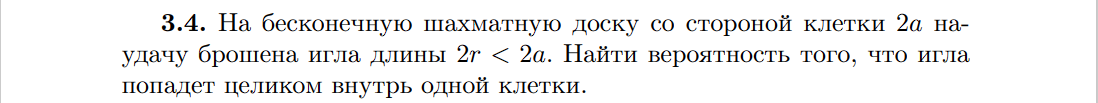

Множество всех благоприятствующих исходов будет являться квадрат со стороной (2а-2r) в квадрате со стороной 2а. Ответом будет отношение площадей P(A)=[(2a-2r)^2]/(2a^2)

In [11]:
a = 4
r = 2

In [12]:
theoretical_probability = (a - r) ** 2 / (a) ** 2
theoretical_probability

0.25

Методом Монте-Карло:

0.443096


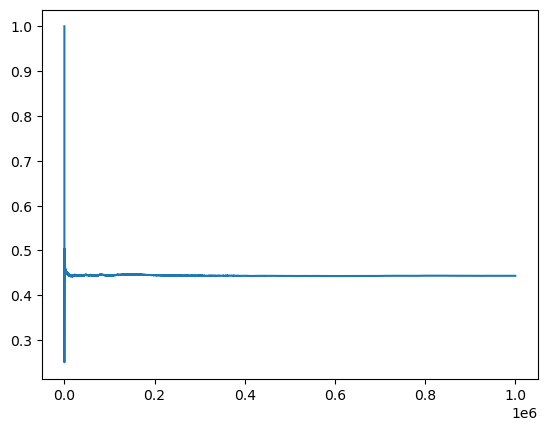

In [18]:
# установим зерно генератора случайных чисел
np.random.seed(seed=123321)
amount = 1000000
# будем рассматривать вероятность попасть в 1 клетку целиком
# зададим границы клетки
a0 = 0
a1 = a0 + a
r = 2
proba = []
success = 0
count = 0
for _ in range(amount):
    # находим случайную точку броска иголки в окрестности клетки
    x = np.random.uniform(a0, a1)
    y = np.random.uniform(a0, a1)
    # находим случайный угол на который наклонилась игла
    angle = np.random.uniform(0, 360)
    # находим конец иглы с учетом её наклона
    rx = x + r * np.cos(angle * np.pi / 180)
    ry = y + r * np.sin(angle * np.pi / 180)
    count += 1
    # проверяем целиком ли игла поместилась в клетку
    if a0 <= x <= a1 and a0 <= y <= a1:
        if a0 <= rx <= a1 and a0 <= ry <= a1:
            success += 1
    proba.append(success / count)
# последняя полученная вероятность
print(proba[-1])
# изобразим как менялась наша вероятность
plt.plot(range(amount), proba)
plt.show()

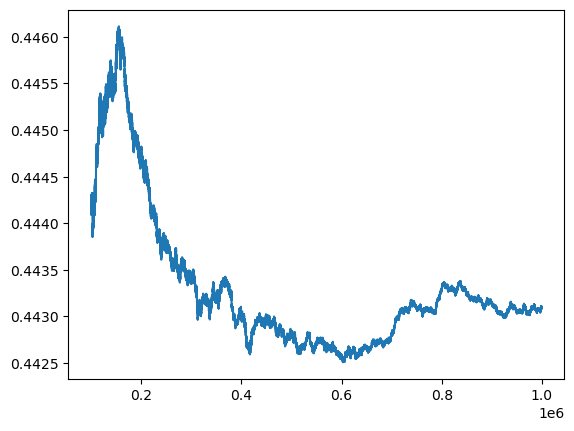

In [14]:
# отобразим как менялись последние 100 тыс. вероятностей
plt.plot(range(100000, amount), proba[100000:])
plt.show()

In [15]:
error = int((((proba[-1] / theoretical_probability) - 1) * 100))
print('Погрешность составила',error,'%')

Погрешность составила 77 %
